# FordGoBike Data Exploration and Visualization
## by Youssef Lasheen

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below.
Try and motivate your exploration goals through this section.

In [2]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')


## Exploration

In [3]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [5]:
df.describe()


,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [6]:
df.isnull().sum()


duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [7]:
df.duplicated().sum()

0

## Cleaning

In [8]:
#Remove null values
df = df.dropna()

df.isnull().sum()


duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [20]:
#Changing types
df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

### What is the structure of your dataset?

## Dataset features
- Rides(start,end).
- Station(start - end - name - geolocation).
- User(gender, birth date, user type).
- Bike id.

### What is/are the main feature(s) of interest in your dataset?

- Trip duration and it's relation to other variables about the user like birth year, gender ,and user_type
- The effect of date with the count of rides
### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

- member_birth_year, member_gender,user_type
- duration_sec, start_time, end_time

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

### Gender

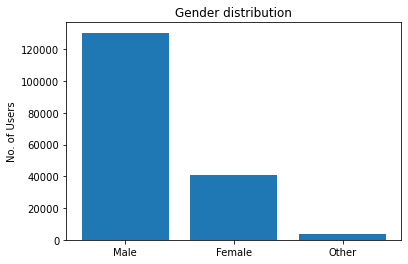

In [10]:
plt.bar(x = df.member_gender.value_counts().keys(), height = df.member_gender.value_counts() )
plt.title('Gender distribution')
plt.ylabel('No. of Users')
plt.show()

### member_birth_year

In [11]:
#Check for ouliers in the age column

df['member_birth_year'].describe()


count    174952.000000
mean       1984.803135
std          10.118731
min        1878.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

<AxesSubplot:ylabel='member_birth_year'>

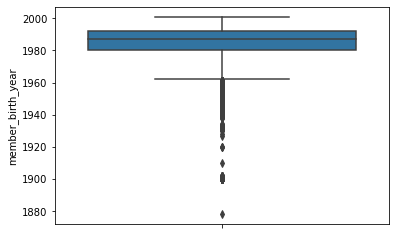

In [12]:
sb.boxplot(data = df, y = 'member_birth_year')


#### min value is 1878 which is non sensical so I will limit the ages to min 1960

In [13]:
df = df[df['member_birth_year'] >= 1960]
df['member_birth_year'].describe()


count    170798.000000
mean       1985.573344
std           8.826842
min        1960.000000
25%        1981.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

 ### duration_sec

<AxesSubplot:ylabel='duration_sec'>

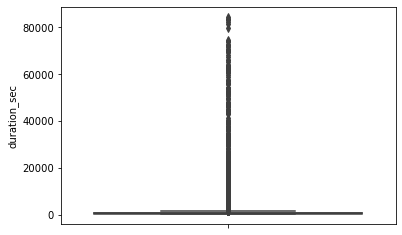

In [39]:
sb.boxplot(data = df, y = 'duration_sec')


In [40]:
df['duration_sec'].describe(percentiles=[.99])


count    170798.000000
mean        703.067138
std        1657.290421
min          61.000000
50%         509.000000
99%        3176.000000
max       84548.000000
Name: duration_sec, dtype: float64

In [41]:
#Looks like 99% of the durations are less than 3176 so mi filtered it3176.000000 
df = df.query('duration_sec <= 3176')

### user_type


<AxesSubplot:xlabel='user_type', ylabel='count'>

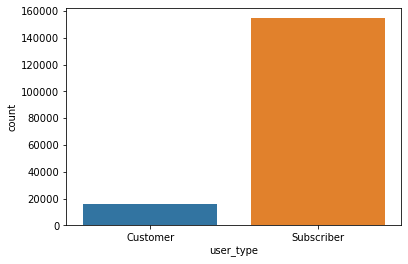

In [14]:
sb.countplot(data = df, x = 'user_type')


Conclusion: Most of the users are subscribers

In [27]:
#Time analysis
df['start_week'] = df['start_time'].dt.day_name()
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,170798.000000,170798.000000,170798.000000,170798.000000,170798.000000,170798.000000,170798.000000,170798.000000,170798.000000
mean,703.067138,139.235746,37.771299,-122.351894,136.778229,37.771488,-122.351458,4489.778838,1985.573344
std,1657.290421,111.768918,0.100276,0.117576,111.425012,0.100180,0.117134,1656.030264,8.826842
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1960.000000
25%,322.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3824.000000,1981.000000
50%,509.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4963.000000,1987.000000
75%,786.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5508.000000,1992.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


<AxesSubplot:xlabel='start_week', ylabel='count'>

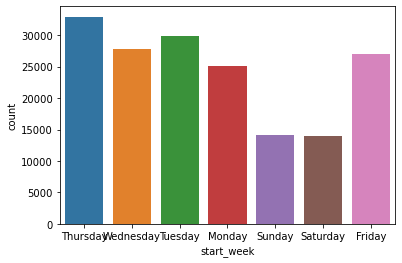

In [28]:
sb.countplot(data = df, x = 'start_week')


#### Concluson: Most people use the service at weekdays more than weekends

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
I made the following obseravtion by viewing the graphs:
- There were more male riders than female,
- Most people were subscribers other than customers. 
- Most people were 25 to 60 years old.
- Most people use the service at weekdays more than weekends

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

- I excluded the outliers in the birthdate column to focus the data
- Looks like 99% of the durations are less than 3176 so i filtered it
- I formated the start_time and end_time variable in the correct datetime format
- Added the start week field


## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

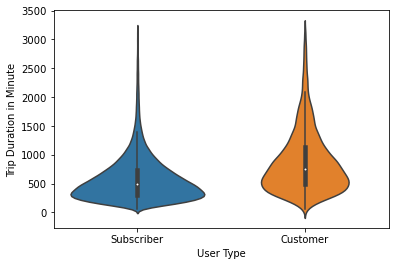

In [42]:
sb.violinplot(data=df, x='user_type', y='duration_sec')
plt.xlabel('User Type');
plt.ylabel('Trip Duration(sec)')

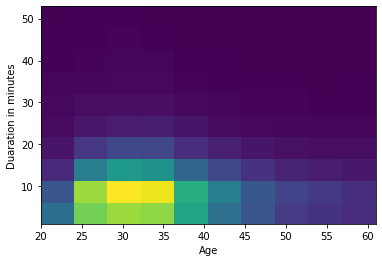

In [88]:

# Plot between age and duration in minutes values.


plt.hist2d((2021 - df['member_birth_year']), df['duration_sec']/60,)
plt.xlabel('Age')
plt.ylabel('Duaration in minutes')
plt.show()

Text(0, 0.5, 'User type')

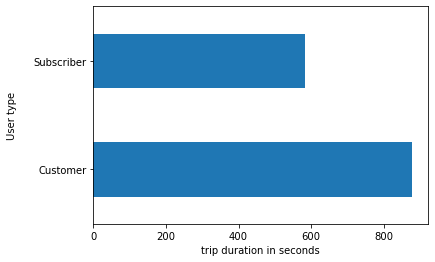

In [56]:
axis = df.groupby('user_type')['duration_sec'].mean().plot(kind='barh')
axis.set_xlabel('trip duration in seconds')
axis.set_ylabel('User type', labelpad=16)


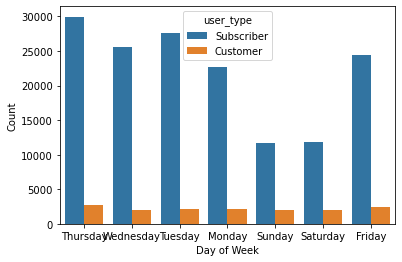

In [57]:

sb.countplot(data=df, x='start_week', hue='user_type')
plt.xlabel('Day of Week');
plt.ylabel('Count');

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Trip duration is inversly correlated to the age of the user I.e Young members get longer trips.
- Frequent users age is between 20 and 45.
- Customers on average take longer trips than subscribers
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Subscribers age range is a bit higher than cutomers

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

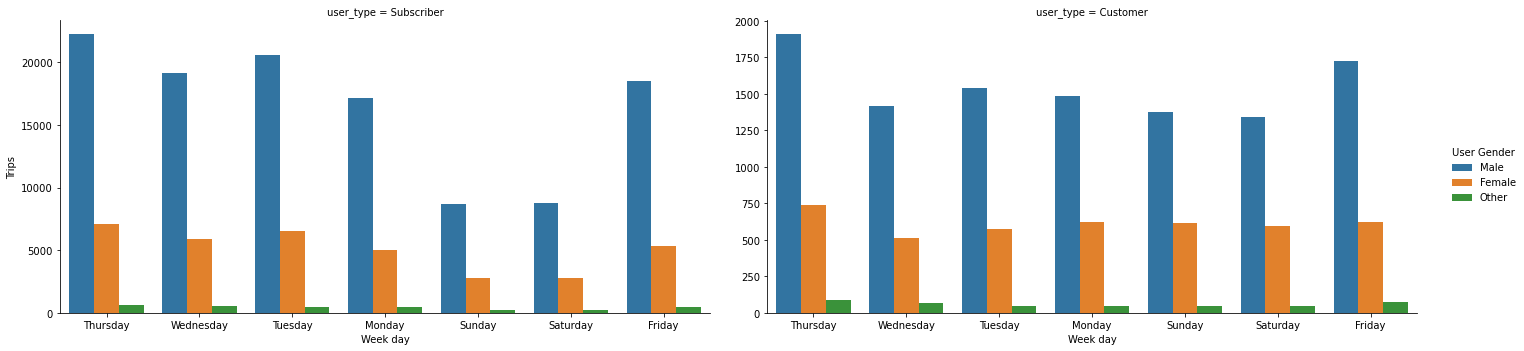

In [67]:
# Weekly usage in realtion to  user type and gender
graph = sb.catplot(data=df, x='start_week', col="user_type", hue="member_gender", kind='count', sharey = False, aspect=2)

graph._legend.set_title('User Gender')
graph.set_axis_labels("Week day", "Trips")





### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

- Number of males is higher but females and others have longer trips
- For subscribers the trip duration is higher than customer for higher age (Lower birthdate).



### Were there any interesting or surprising interactions between features?

Yes. it is not intutive that females will have longer trips when they count so much less in the overall user count

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!